In [76]:
import pymysql
import pandas as pd
import lxml

In [77]:
## database password
## hidden
pw = '04250629'

In [78]:
# conn = pymysql.connect(
#     host='localhost',
#     user='root',
#     password=pw,
#     db='stock',
#     charset='utf8'
#     )

# # create cursor
# ## create company_info and daily_price table if not exists
# with conn.cursor() as curs:
#     sql = """
#     CREATE TABLE IF NOT EXISTS company_info (
#         code VARCHAR(20),
#         company VARCHAR(100),
#         last_update DATE,
#         PRIMARY KEY (code)
#     )
#     """

#     curs.execute(sql)

#     sql = """
#     CREATE TABLE IF NOT EXISTS daily_price(
#         code VARCHAR(20),
#         date DATE,
#         open BIGINT,
#         high BIGINT,
#         low BIGINT,
#         close BIGINT,
#         diff BIGINT,
#         volume BIGINT,
#         PRIMARY KEY (code, date)
#     )
#     """
#     curs.execute(sql)
#     curs.close()
        
#     # commit
# conn.commit()

In [79]:
# url="https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13"
# krx = pd.read_html(url, header=0)[0]
# krx = krx[['종목코드', '회사명']]
# krx = krx.rename(columns={'종목코드':'code', '회사명':'company'})
# krx.code = krx.code.map('{:06d}'.format)
# krx.head()                               

In [80]:
# from datetime import datetime
# codes = dict()
# sql = "SELECT * FROM company_info"
# df = pd.read_sql(sql, conn)
# for idx in range(len(df)):
#     ## update codes dictionary using code and company_name
#     codes[df['code'].values[idx]] = df['company'].values[idx]
# with conn.cursor() as curs:
#     sql = """
#     SELECT max(last_update) FROM company_info
#     """
#     curs.execute(sql)
#     ## get recent update date
#     rs = curs.fetchone()
#     today = datetime.today().strftime('%Y-%m-%d')

#     if rs[0] == None or rs[0].strftime('%Y-%m-%d') < today:
#         for idx in range(len(krx)):
#             code = krx.code.values[idx]
#             company = krx.company.values[idx]
#             sql = f"REPLACE INTO company_info (code, company, last_update) VALUES ('{code}', '{company}', '{today}')"
#             curs.execute(sql)
#             codes[code] = company
#             tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
#             print(f"[{tmnow}] #{idx+1:04d} REPLACE INTO company_info VALUES ({code}, {company}, {today})")
#         conn.commit()
#         print('')
#     curs.close()



In [81]:
# from bs4 import BeautifulSoup
# import urllib
# import requests

# # setting UA header
# header = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}

# # request url
# url = 'http://finance.naver.com/item/sise_day.nhn?code=005930'
# request = urllib.request.Request(url, headers=header)

# # get html
# doc =urllib.request.urlopen(request)
# html = BeautifulSoup(doc, "lxml")

# # parsing
# ## find the last page
# pgrr = html.find('td', class_='pgRR')
# s = str(pgrr.a['href']).split('=')
# lastpage = s[-1]

# # make dataframe
# df = pd.DataFrame()

# # crawling
# ## crawling min(lastpage, 10) pages
# pages = min(int(lastpage), 10)
# for page in range(1, pages+1):
#     page_url = '{}&page={}'.format(url, page)
#     # append daily prices into dataframe
#     df = df.append(pd.read_html(requests.get(page_url, headers=header).text)[0])
#     tmnow = datetime.now().strftime('%Y-%m-%d %H:%M')
#     print('[{}] {} ({}) : {:04d}/{:04d} pages are downloading...'.format(tmnow, codes['005930'], '005930', page, pages), end="\r")

# df = df.rename(columns={'날짜':'date', '종가':'close', '전일비':'diff', '시가':'open', '고가':'high', '저가':'low', '거래량':'volume'})
# df = df.dropna()
# df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int)
# df = df[['date', 'open', 'high', 'low', 'close', 'diff', 'volume']]

# df.head()



## Naver

In [82]:
import KospiAnalyzer as ka

df_naver = ka.KospiTicker().get_daily_price('NAVER', '2019-01-01')
df_naver

end_date is initialized to '2023-06-07'


/Users/woojin/Documents/Github/projects/stock/dbupdater/KospiAnalyzer.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  krx = pd.read_sql(sql, self.conn)
/Users/woojin/Documents/Github/projects/stock/dbupdater/KospiAnalyzer.py:93: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, self.conn)


,code,date,open,high,low,close,diff,volume
date,,,,,,,,
2019-01-02,035420,2019-01-02,121000,122000,117000,118000,4000,356120
2019-01-03,035420,2019-01-03,120000,125000,119000,122000,4000,525020
2019-01-04,035420,2019-01-04,123500,126000,122500,125500,3500,520785
2019-01-07,035420,2019-01-07,128000,132500,127000,131500,6000,502619
2019-01-08,035420,2019-01-08,132000,134000,129000,130000,1500,376127
...,...,...,...,...,...,...,...,...
2023-05-30,035420,2023-05-30,205000,205000,200500,201500,1000,609318
2023-05-31,035420,2023-05-31,201500,203000,199100,199500,2000,993582
2023-06-01,035420,2023-06-01,199900,204000,199900,204000,4500,547388


In [83]:
df_naver['close']

date
2019-01-02    118000
2019-01-03    122000
2019-01-04    125500
2019-01-07    131500
2019-01-08    130000
               ...  
2023-05-30    201500
2023-05-31    199500
2023-06-01    204000
2023-06-02    204500
2023-06-05    204500
Name: close, Length: 1093, dtype: int64

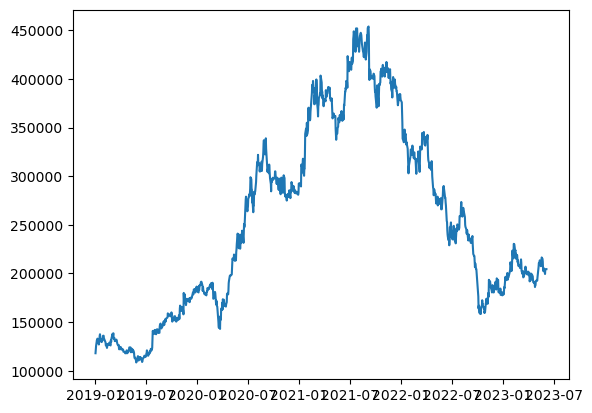

In [84]:
import matplotlib.pyplot as plt

plt.plot(df_naver['close'])
plt.show()

### Returns

<Axes: xlabel='date'>

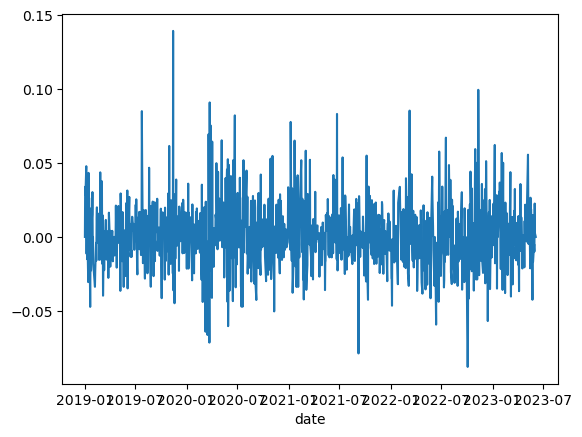

In [85]:
rets_naver = df_naver['close'].pct_change().fillna(0)
rets_naver.plot()

### Volatility

In [86]:
import numpy as np
total_vols_naver = rets_naver.std() * np.sqrt(252)
total_vols_naver

0.3581354359906759

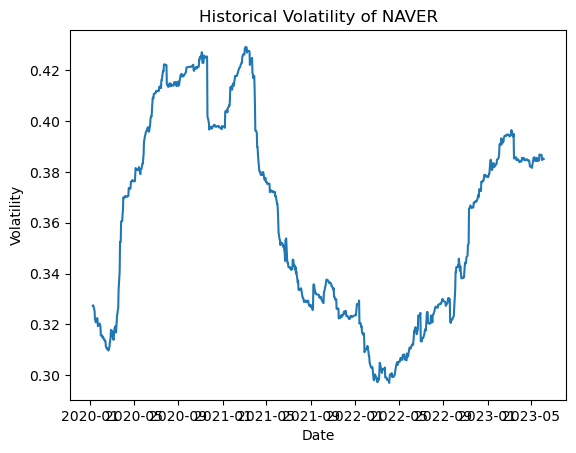

In [87]:
# Rolling Volatility
vols_naver = rets_naver.rolling(252).std() * np.sqrt(252)
vols_naver.plot()
plt.title('Historical Volatility of NAVER')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


## Bollinger Band

In [88]:
df_naver['MA20'] = df_naver['close'].rolling(window=20).mean()
df_naver['MV20'] = df_naver['close'].rolling(window=20).std()
df_naver['bolllinger_upper'] = df_naver['MA20'] + (df_naver['MV20'] * 2)
df_naver['bollinger_lower'] = df_naver['MA20'] - (df_naver['MV20'] * 2)

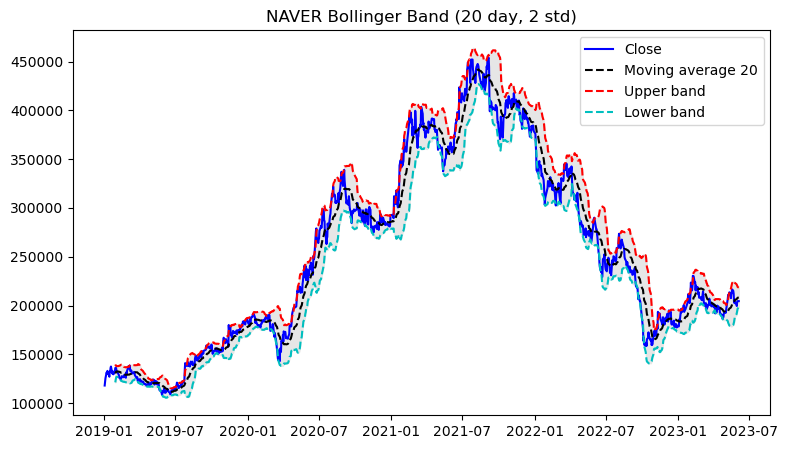

In [89]:
plt.figure(figsize=(9, 5))
plt.plot(df_naver.index, df_naver['close'], color='#0000ff', label='Close')
plt.plot(df_naver.index, df_naver['MA20'], 'k--', label='Moving average 20')
plt.plot(df_naver.index, df_naver['bolllinger_upper'], 'r--', label='Upper band')
plt.plot(df_naver.index, df_naver['bollinger_lower'], 'c--', label='Lower band')
plt.fill_between(df_naver.index, df_naver['bolllinger_upper'], df_naver['bollinger_lower'], color='0.9')
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

## Bollinger band index : %b
$$\%b=\frac{close-lower}{upper - loswer}$$

In [90]:
df_naver['bollinger_percentage'] = (df_naver['close'] - df_naver['bollinger_lower']) / (df_naver['bolllinger_upper'] - df_naver['bollinger_lower'])

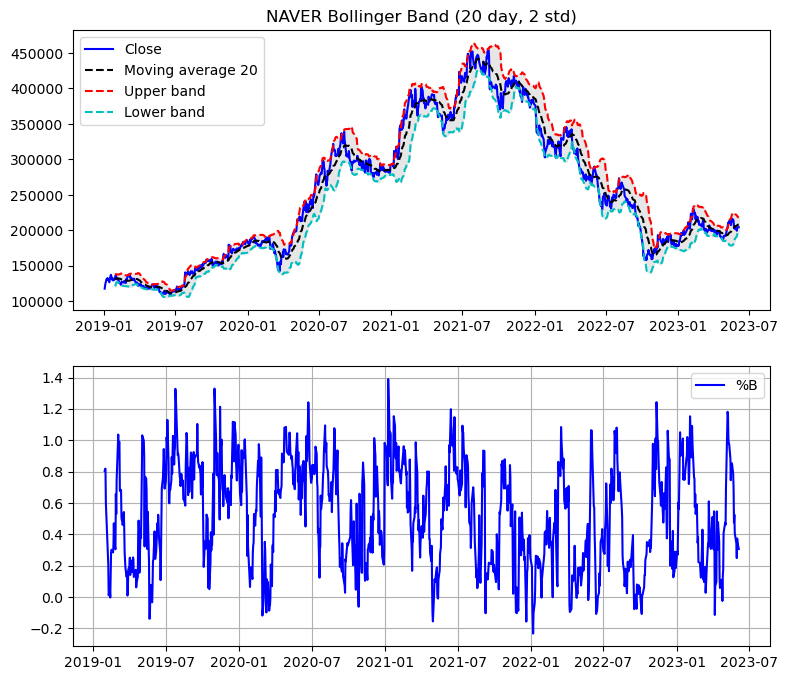

In [91]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(df_naver.index, df_naver['close'], color='#0000ff', label='Close')
plt.plot(df_naver.index, df_naver['MA20'], 'k--', label='Moving average 20')
plt.plot(df_naver.index, df_naver['bolllinger_upper'], 'r--', label='Upper band')
plt.plot(df_naver.index, df_naver['bollinger_lower'], 'c--', label='Lower band')
plt.fill_between(df_naver.index, df_naver['bolllinger_upper'], df_naver['bollinger_lower'], color='0.9')
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')

plt.subplot(2, 1, 2)
plt.plot(df_naver.index, df_naver['bollinger_percentage'], color='b', label='%B')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [95]:
# bollinger bandwidth
df_naver['bollinger_bandwidth'] = (df_naver['bolllinger_upper'] - df_naver['bollinger_lower']) / df_naver['MA20'] * 100

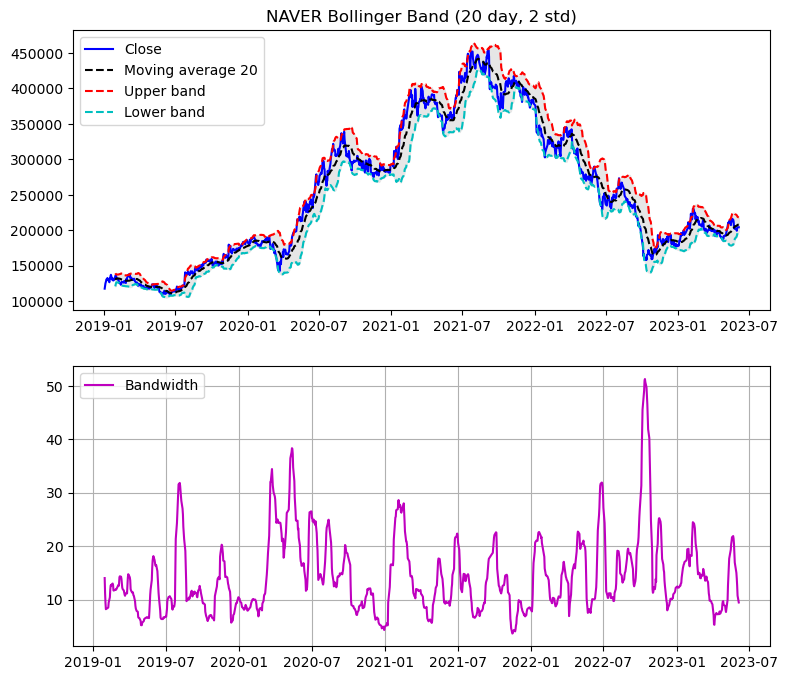

In [96]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(df_naver.index, df_naver['close'], color='#0000ff', label='Close')
plt.plot(df_naver.index, df_naver['MA20'], 'k--', label='Moving average 20')
plt.plot(df_naver.index, df_naver['bolllinger_upper'], 'r--', label='Upper band')
plt.plot(df_naver.index, df_naver['bollinger_lower'], 'c--', label='Lower band')
plt.fill_between(df_naver.index, df_naver['bolllinger_upper'], df_naver['bollinger_lower'], color='0.9')
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')

plt.subplot(2, 1, 2)
plt.plot(df_naver.index, df_naver['bollinger_bandwidth'], color='m', label='Bandwidth')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## Summary 

In [97]:
print('return yesterday: ', rets_naver[-1])
print('volatiltity yesterday: ', vols_naver[-1])
print('Bollinger band percentage yesterday: ', df_naver['bollinger_percentage'][-1])
print('Bollinger band percentage day before yesterday: ', df_naver['bollinger_percentage'][-2])
print('Bollinger band bandwidth: ', df_naver['bollinger_bandwidth'][-1])

return yesterday:  0.0
volatiltity yesterday:  0.38504692523232714
Bollinger band percentage yesterday:  0.3065249715010705
Bollinger band percentage day before yesterday:  0.34793868158727603
Bollinger band bandwidth:  9.489976340527463


In [ ]:
# curs.close()
# conn.close()